# Exercise: RDataFrame and collections

The same dataset used in the previous exercise (`TTree` "dataset" in file `../data/example_file.root`) contains two vector columns `vec1` and `vec2`.<br>
The elements of `vec1` are distributed as a mixture of Gaussians, plus background noise.<br>
To remove the background noise, select the elements of `vec1` for which the square of the corresponding elements in `vec2` is less than 0.1.

Where are the peaks of this mixture of Gaussians?

### Useful links

- [RDataFrame: working with collections](https://root.cern/doc/master/classROOT_1_1RDataFrame.html#collections)
- [RVec reference](https://root.cern/doc/master/classROOT_1_1VecOps_1_1RVec.html)

In [1]:
import ROOT

Welcome to JupyROOT 6.30/07


In [2]:
treename = "dataset"
filename = "example_file.root"
df = ROOT.RDataFrame(treename, filename)
df.GetColumnNames()

vector<string>{ "a", "b", "vec1", "vec2" }

In [10]:
df2 = df.Define("d", "vec1[ vec2*vec2 < 0.1 ]")

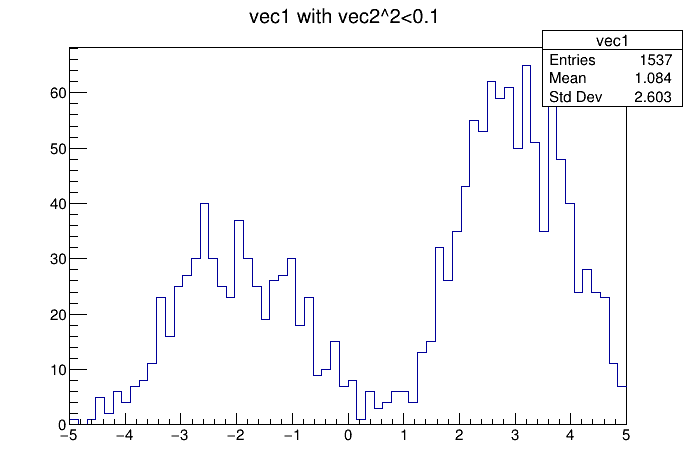

In [23]:
h = df2.Histo1D(("vec1", "vec1 with vec2^2<0.1", 64, -5, 5), "d")
c = ROOT.TCanvas()
h.Draw()
c.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      44.8871
NDf                       =           31
Edm                       =  6.02753e-07
NCalls                    =           60
Constant                  =      31.5516   +/-   1.68049     
Mean                      =     -2.03406   +/-   0.0487558   
Sigma                     =      1.06212   +/-   0.036197     	 (limited)
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      36.5731
NDf                       =           26
Edm                       =  4.25636e-08
NCalls                    =           59
Constant                  =      60.3702   +/-   2.5441      
Mean                      =      3.01504   +/-   0.0355523   
Sigma                     =     0.955438   +/-   0.0287661    	 (limited)


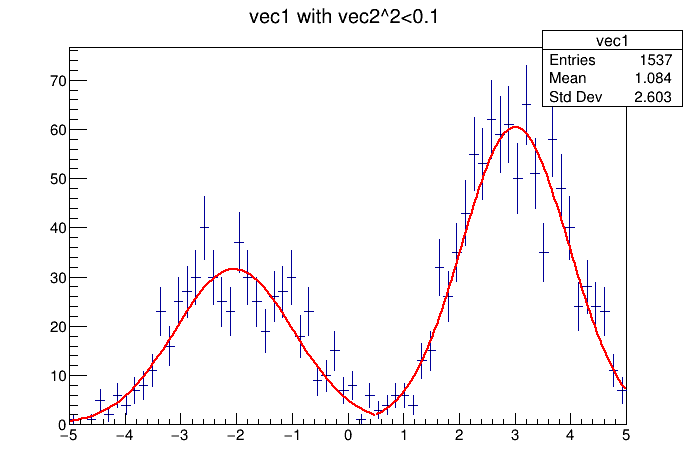

In [24]:
gaus1 = ROOT.TF1("gaus1", "gaus", -5, 0.5)  
h.Fit(gaus1, "R")

gaus2 = ROOT.TF1("gaus2", "gaus", 0.5, 5)
h.Fit(gaus2, "R+" )

c1=ROOT.TCanvas()
h.Draw("E")
c1.Draw()

### Peak 1(negative) : 19.3166   +/-   1.11734 

### Peak 2(positive) : 37.6829   +/-   1.62962